# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data_all = data.copy()
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print ("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
    print ("Wholesale customers dataset_all has {} samples with {} features each.".format(*data_all.shape))

except:
    print ("Dataset could not be loaded. Is the dataset missing?")
    
display(data.head(), data_all.head())

# This data values are monetary units (m.u.)

Wholesale customers dataset has 440 samples with 6 features each.
Wholesale customers dataset_all has 440 samples with 8 features each.


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185

## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe(), data_all.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper  Delicatessen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [100,200,400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
samples_all = pd.DataFrame(data_all.loc[indices], columns = data_all.keys()).reset_index(drop = True)

print ("Chosen samples of wholesale customers dataset:")
display(samples, samples_all)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  11594   7779    12144    3252              8035          3029
1   3067  13240    23127    3941              9959           731
2   4446    906     1238    3576               153          1014

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  11594   7779    12144    3252              8035   
1        2       1   3067  13240    23127    3941              9959   
2        1       3   4446    906     1238    3576               153   

   Delicatessen  
0          3029  
1           731  
2          1014

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
__This was the anwer on the actual exercise. May not apply__
My first selection could be a restaurant. This customer spend money in all categories. 
The second selection might be a cafe or a place that sales or uses milk in large volumes. In this category the customer spend higher than average. 
The last one might be an office or small cafeteria/supermarket given that most of the values are below the averages. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor


# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Milk', axis=1)
display(new_data.head())

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Milk'], test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor = regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score_train = cross_val_score(regressor, X_train, y_train, cv=5)
print (np.mean(score_train))

score_test = cross_val_score(regressor, X_test, y_test, cv=5)
print (np.mean(score_test))

Fresh  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669     7561     214              2674          1338
1   7057     9568    1762              3293          1776
2   6353     7684    2405              3516          7844
3  13265     4221    6404               507          1788
4  22615     7198    3915              1777          5185

0.040896600720738654
-0.0033092372693126924


In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor

def run_model_each_feature(df):
    sum_df = pd.DataFrame()
    for column in df.columns:
        col_df = pd.DataFrame({'Feature':[column]})
        new_data = df.drop(column, axis=1)
        # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
        # Set a random state.
        X_train, X_test, y_train, y_test = train_test_split(new_data, df[column], test_size=0.25, random_state=42)

        # TODO: Create a decision tree regressor and fit it to the training set
        regressor = DecisionTreeRegressor(random_state=42)
        regressor = regressor.fit(X_train, y_train)

        # TODO: Report the score of the prediction using the testing set
        score_train = cross_val_score(regressor, X_train, y_train, cv=5)        
        score_test = cross_val_score(regressor, X_test, y_test, cv=5)
        col_df.loc[:,'Train_score'] = np.mean(score_train).astype(np.float64)
        col_df.loc[:,'Test_score'] = np.mean(score_test).astype(np.float64)
        sum_df = pd.concat([sum_df, col_df], 0)
    return sum_df

In [7]:
run_model_each_feature(data)

Feature  Train_score  Test_score
0             Fresh    -0.968203   -1.707187
0              Milk     0.040897   -0.003309
0           Grocery     0.653860    0.580732
0            Frozen    -2.028319   -1.371890
0  Detergents_Paper     0.702957    0.250353
0      Delicatessen    -4.999522   -0.488606

In [8]:
run_model_each_feature(data_all)

Feature  Train_score  Test_score
0           Channel     0.463925    0.063637
0            Region    -1.094319   -2.968509
0             Fresh    -1.022309   -1.588360
0              Milk     0.107786    0.043862
0           Grocery     0.675007    0.572939
0            Frozen    -2.889591   -1.624300
0  Detergents_Paper     0.691502    0.265106
0      Delicatessen    -4.397976   -0.404092

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
I tried to predict Milk
The score was -0.0033
Well the reported score is the average of a 5 k-fold cross validation. Being negative sugges that the other features can not predict Milk. This point combined suggest that Milkk is an important feature in to identigy customer's spending habits. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000

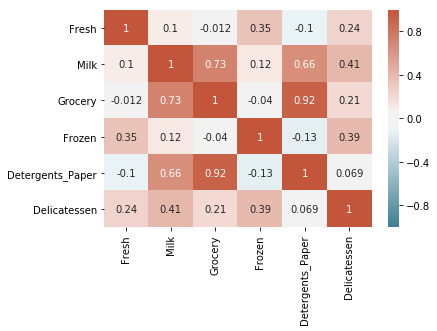

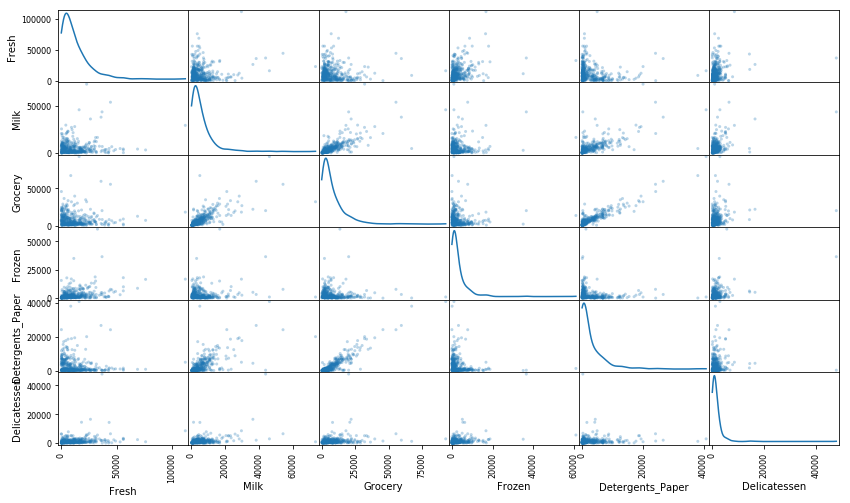

In [9]:
import seaborn as sns
from tabulate import tabulate

correlations = data.corr(method = 'pearson')

display(correlations)

cmap = sns.diverging_palette(220, 20, sep = 20, as_cmap = True)

sns.heatmap(correlations, vmin = -1, vmax = 1, annot = True, cmap = cmap)

pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
Normality: It seems all of the features in the dataset do not have a normal distribution, all of them showed an skewd distribution towards the left of the graph. The distribution, combined with the extension of the graph towards the right and the accomulation of data point towards 0, indicated that all features also suffer from outlyers. Outlyers are also evident from the data.describe function as for all features, the max and min values are relatively far from from the mean. 

Most of the features do not show correlations with eachother. Except for Grocery and Detergents_paper with had a 0.96 R^2 value. Milk with Grocery and Detergents_paper are the next correlations with relatively large values (0.73, 0.66) but they are low to call it a good correlation. 

This graphs confimermend my suggestions about the features not been able to predict milk and the importance of this variable in the dataset for the model. 

Neither milk, nor the features that "correlate" with it are distributed normaly. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

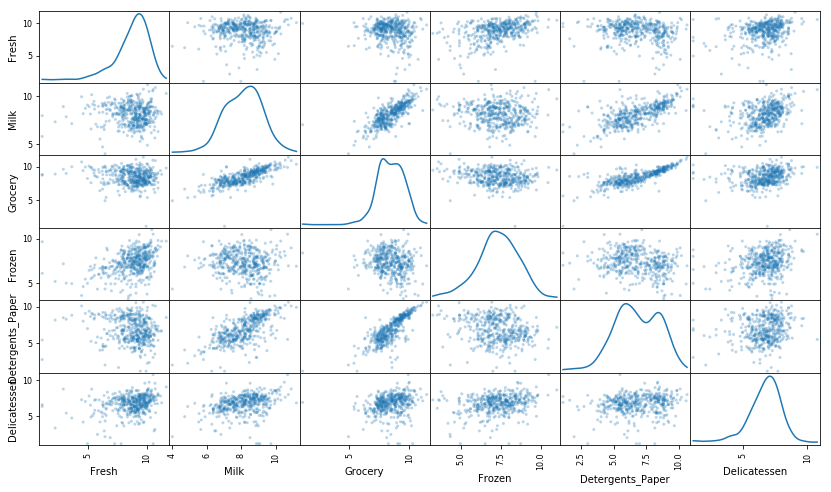

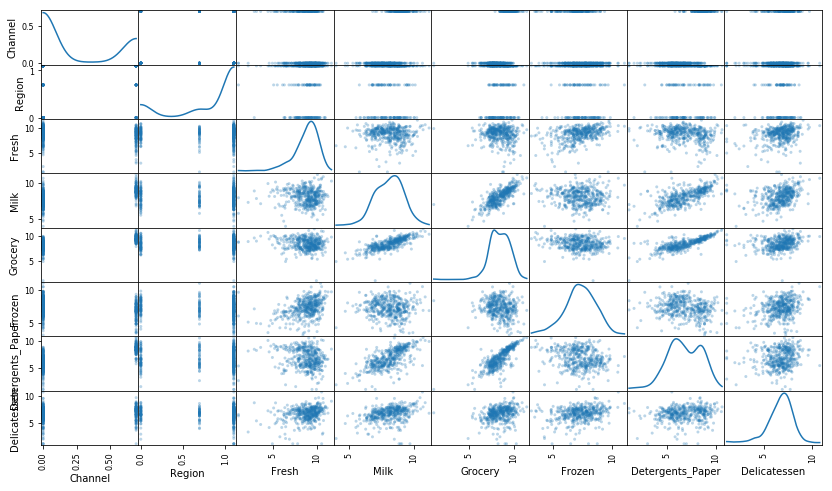

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)
log_data_all = np.log(data_all)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
pd.plotting.scatter_matrix(log_data_all, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [11]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.358243  8.959183   9.404590  8.087025          8.991562      8.015988
1  8.028455  9.490998  10.048756  8.279190          9.206232      6.594413
2  8.399760  6.809039   7.121252  8.182000          5.030438      6.921658

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

In [12]:
outliers_all = np.array([], dtype='int64')

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    #print(Q1)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    #print(Q3)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5
    #print(step)
    # Display the outliers
    #print ("Data points considered outliers for the feature '{}':".format(feature))
    #display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    out_list_feat=list(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)
    outliers_all = np.append(outliers_all, out_list_feat)
# OPTIONAL: Select the indices for data points you wish to remove

from collections import Counter
#all_indices = [df.index.tolist() for feature, df in ouliers_by_feature.iteritems()]
#flattened_indices = [index for index_list in all_indices for index in index_list]
#outliers  = [index for index, count in Counter(ouliers_by_feature).iteritems() if count > 1]
#print ("Indices for rows that include outliers for multiple features: '{}'".format(outliers))

#print((outliers_all))
out_count = Counter(outliers_all)
out_customer =[]
for customer, count in out_count.items():
    if count > 1:
        out_customer.append(customer)
outliers  = sorted(out_customer)

print("Outliers found in more than one feature:", outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
display(good_data.head())
display(good_data.describe())

Outliers found in more than one feature: [65, 66, 75, 128, 154]


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   9.446913  9.175335  8.930759  5.365976          7.891331      7.198931
1   8.861775  9.191158  9.166179  7.474205          8.099554      7.482119
2   8.756682  9.083416  8.946896  7.785305          8.165079      8.967504
3   9.492884  7.086738  8.347827  8.764678          6.228511      7.488853
4  10.026369  8.596004  8.881558  8.272571          7.482682      8.553525

Fresh        Milk     Grocery      Frozen  Detergents_Paper  \
count  435.000000  435.000000  435.000000  435.000000        435.000000   
mean     8.766671    8.128376    8.460236    7.324601          6.799008   
std      1.423133    1.062911    1.046108    1.261038          1.684562   
min      1.098612    4.718499    5.384495    3.218876          1.098612   
25%      8.073389    7.364809    7.676010    6.647029          5.560615   
50%      9.055439    8.198089    8.467372    7.340187          6.700731   
75%      9.737108    8.877379    9.274768    8.177371          8.277644   
max     11.627601   11.205013   11.437986   11.016479         10.617099   

       Delicatessen  
count    435.000000  
mean       6.694349  
std        1.261066  
min        1.098612  
25%        6.019808  
50%        6.874198  
75%        7.509609  
max       10.777768

In [13]:
def outliers_elim(df):
    outliers_all = np.array([], dtype='int64')

    # For each feature find the data points with extreme high or low values
    for feature in df.keys():
        # Calculate Q1 (25th percentile of the data) 
        Q1 = np.percentile(df[feature], 25)
        # Calculate Q3 (75th percentile of the data)
        Q3 = np.percentile(df[feature], 75)
        # Calculate an outlier step (1.5 times the interquartile range)
        step = (Q3 - Q1) * 1.5
        # Identify outliers (values outside the step)
        out_list_feat=list(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))].index)
        outliers_all = np.append(outliers_all, out_list_feat)
    from collections import Counter
    out_count = Counter(outliers_all)
    out_customer =[]
    for customer, count in out_count.items():
        if count > 1:
            out_customer.append(customer)
    outliers  = sorted(out_customer)

    print("Outliers found in more than one feature:", outliers)

    # Remove the outliers, if any were specified
    n_out_data = df.drop(df.index[outliers]).reset_index(drop = True)
    return n_out_data

In [14]:
good_data = outliers_elim(log_data)

Outliers found in more than one feature: [65, 66, 75, 128, 154]


**Answer:**

I found 5 points that are oulyers in at least two different variables. 
These points are:
65,66,75,128, and 154

Given that these points are affecting various variables, it may mean that this customer, or customers, do not purchase regularly but each time they buy, they buy a lot of a paricular set of products. These point should be removed. 

I removed them to prevent any effect of in further analyses. Having the ouliers present in the dataset, could lead to create worng clusters and/or classification of the customers in the wrong cluster. The latest could affect the relation with the customer given the decissions that will be taken from this model.  

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

The first 1 componenents of the PCA on the good_data explain 44.30 percent of the variace
The first 2 componenents of the PCA on the good_data explain 70.68 percent of the variace
The first 3 componenents of the PCA on the good_data explain 82.99 percent of the variace
The first 4 componenents of the PCA on the good_data explain 93.11 percent of the variace
The first 5 componenents of the PCA on the good_data explain 97.96 percent of the variace

           Fresh        Milk     Grocery      Frozen    Detergents_Paper    Delicatessen
--  -----------  ----------  ----------  ----------  ------------------  --------------
 0   0.167464    -0.401439   -0.438111    0.17821             -0.751426      -0.149871
 1  -0.685935    -0.167228   -0.070729   -0.500542            -0.042444      -0.494147
 2  -0.677389     0.040205   -0.0195332   0.315043            -0.211702       0.628551
 3  -0.204293     0.0128107   0.0556756   0.785449             0.209614      -0.54234
 4  -0.00261356   0.71923

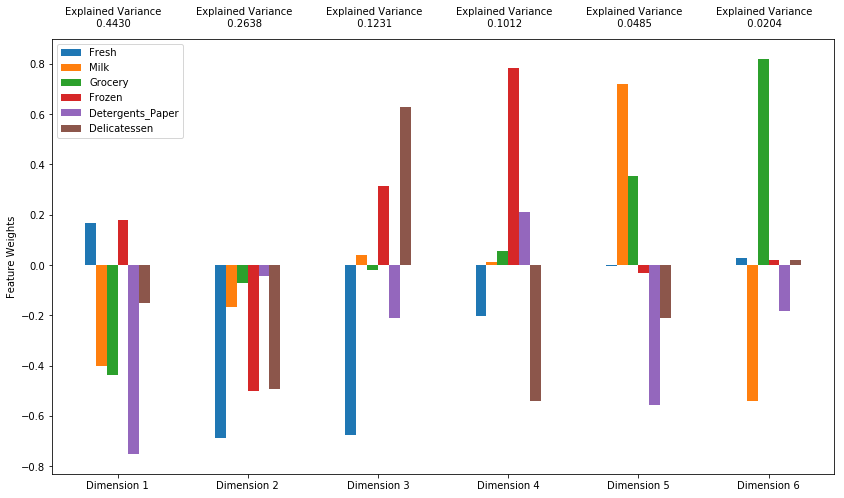

In [15]:
from sklearn.decomposition import PCA
from tabulate import tabulate

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=good_data.shape[1], random_state=42)
pca.fit(good_data)

components = [1, 2,3,4,5]
for component in components:
    print ('The first %s componenents of the PCA on the good_data explain %1.2f percent of the variace' 
      % (component, 100*sum(pca.explained_variance_ratio_[0:component])))
    
print('\n',tabulate(pd.DataFrame(pca.components_, columns=good_data.columns.values), headers='keys'),'\n')
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

##### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
The first two components of the PCA explain 70.68 % of the variance in the data, while the first 4 explain 93.11% of it. 


1. Pricipal Component 1
- Positive contribution:
    The positive weights in this component come from Fresh and Froze products 

- Negative contribution:
    The negative weights in this component come from all other categories in the data

The largest weight comes from Detergent_and_papers, it is negative, followed by Milk and Groceries. This could represent a small retail store. 

2. Pricipal Component 2
- Positive contribution:
    There are not positive weights contributions on this component 

- Negative contribution:
    All features had a negative contribution weight

The largest weight comes from Fresh products. This could represent customers such as Restaurants or Supermarkets.

3. Pricipal Component 3
- Positive contribution:
    Delicatessen and Frozen. 

- Negative contribution:
    Fresh and Detergents_paper

This componenet might be driven by small cafeterias and/or delis, maybe sandwich restaurants

4. Pricipal Component 4
- Positive contribution:
    Frozen and Detergent_paper 

- Negative contribution:
    Delicatessen and Fresh 

Convenience stores or gas station stores could be represented in this particular compoenent. 


# I AM HERE 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [16]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -2.3579      -1.7393       0.2210       0.2840      -0.5939   
1      -2.9903      -0.3645       0.2521       1.5653       0.1922   
2       2.5025       0.1006       1.0091       0.1630      -0.5126   

   Dimension 6  
0      -0.0148  
1       0.1244  
2      -0.0520

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. 

Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. 

Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. 

Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [26]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
#vs.pca_results(good_data, pca)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [27]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -2.3579      -1.7393
1      -2.9903      -0.3645
2       2.5025       0.1006

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

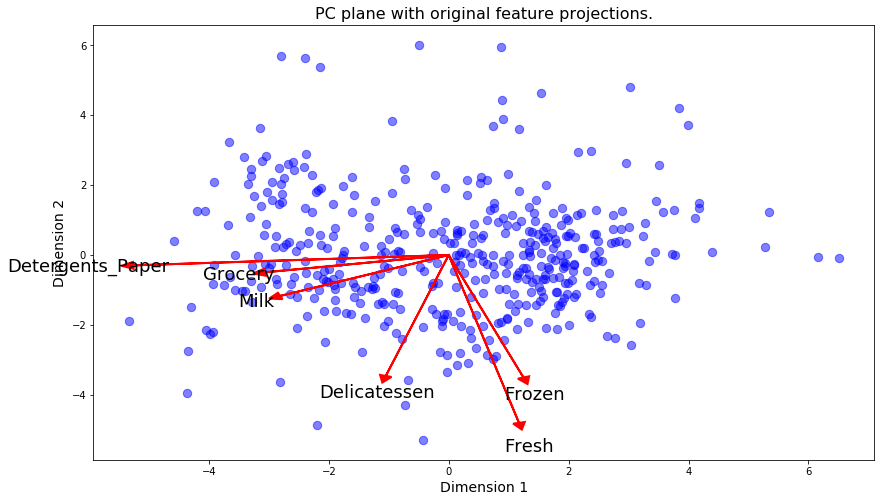

In [95]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

In [51]:
def biplot2(good_data, reduced_data, pca):
    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors[:3]): # Adding the index can be useful to limit the amount of feature in the plot
        print(v)
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

In [52]:
pca.components_

array([[ 0.16746374, -0.40143866, -0.43811142,  0.17820975, -0.75142613,
        -0.14987105],
       [-0.68593522, -0.16722783, -0.07072902, -0.50054207, -0.04244398,
        -0.49414702]])

[ 0.16746374 -0.68593522]
[-0.40143866 -0.16722783]
[-0.43811142 -0.07072902]


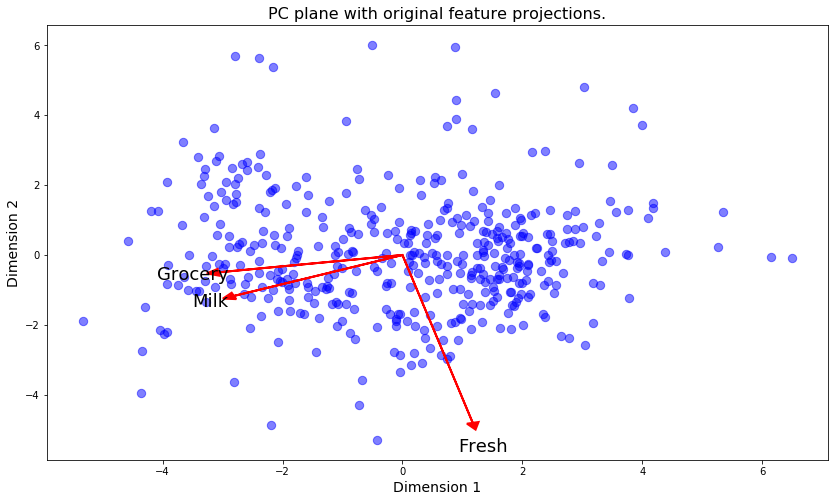

In [53]:
import matplotlib.pyplot as plt
biplot2(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## This description appears to be the opposite to what my graph looks

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

*K-means Advantages*

- K-Means is computationally faster with a large number of features compared to hierarchical clustering, specialy if K is small.
- K-Means may produce tighter clusters than hierarchical clustering.
- Works well even after assumptions are broken
- Easy to implement
- Results as easy to interpret 

https://www.quora.com/What-are-the-advantages-of-K-Means-clustering
http://www.improvedoutcomes.com/docs/WebSiteDocs/Clustering/K-Means_Clustering_Overview.htm

*Gaussian Mixture Model clustering*

- Flexible in terms of cluster covariance
- Can accommodate mixed membership in the clusters
- Provides a density estimation for each cluster

https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm
https://home.deib.polimi.it/matteucc/Clustering/tutorial_html/mixture.html

*Which algorithm to use?*

I am planning to use the Gaussian Mixture Model. The main reason being that looking at the data, it seems that customers from different areas could be buying from the same categories, potentially resulting in being overlapping when being classified. It seems that this could be resolved GMM as it can accomodate mixed memberships


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [72]:
# USING GMM
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components = 2)
clusterer = clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
# TODO: Find the cluster centers
centers = clusterer.means_
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print("The silhouette score for the GMM applied here is:", score)
list_clusters = [2,3,4,5,6,7,8,9,10]
def GMM_model(data, l_clusters):
    df=pd.DataFrame(columns=['No_clusters(K)', 'Score'])
    for i, component in enumerate(l_clusters):
        clusterer = GaussianMixture(n_components=component)
        clusterer = clusterer.fit(reduced_data)
        preds = clusterer.predict(data)
        score = silhouette_score(data, preds)
        df.loc[i] = [component,score]
    return df
dif_cluster_scores = GMM_model(reduced_data, list_clusters)
display(dif_cluster_scores)
print (dif_cluster_scores[dif_cluster_scores['Score']==max(dif_cluster_scores['Score'])])

The silhouette score for the GMM applied here is: 0.4223246826459388


No_clusters(K)     Score
0             2.0  0.422325
1             3.0  0.304252
2             4.0  0.330139
3             5.0  0.288748
4             6.0  0.334943
5             7.0  0.312796
6             8.0  0.269642
7             9.0  0.311810
8            10.0  0.315880

   No_clusters(K)     Score
0             2.0  0.422325


In [74]:
# USING KMEANS
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# TODO: Apply your clustering algorithm of choice to the reduced data 
kmeans = KMeans(n_clusters=2, random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
predsKM = kmeans.predict(reduced_data)
# TODO: Find the cluster centers
centersKM = kmeans.cluster_centers_
# TODO: Predict the cluster for each transformed sample data point
sample_predsKM = clusterer.predict(pca_samples)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print("The silhouette score for the KMEANS applied here is:", score)
list_clusters = [2,3,4,5,6,7,8,9,10]
def KM_model(data, l_clusters):
    df=pd.DataFrame(columns=['No_clusters(K)', 'Score'])
    for i, component in enumerate(l_clusters):
        kmeans = KMeans(n_clusters = component, random_state=0).fit(data)
        preds = kmeans.predict(data)
        score = silhouette_score(data, preds)
        df.loc[i] = [component,score]
    return df
dif_cluster_scores_KM = KM_model(reduced_data, list_clusters)
display(dif_cluster_scores_KM)
print (dif_cluster_scores_KM[dif_cluster_scores_KM['Score']==max(dif_cluster_scores_KM['Score'])])

The silhouette score for the KMEANS applied here is: 0.4223246826459388


No_clusters(K)     Score
0             2.0  0.426281
1             3.0  0.396891
2             4.0  0.332010
3             5.0  0.350991
4             6.0  0.366609
5             7.0  0.363315
6             8.0  0.350994
7             9.0  0.354141
8            10.0  0.351004

   No_clusters(K)     Score
0             2.0  0.426281


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
I tried Ks from 2 to 10. Of these the best score (0.421917) was obtained at k = 2. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

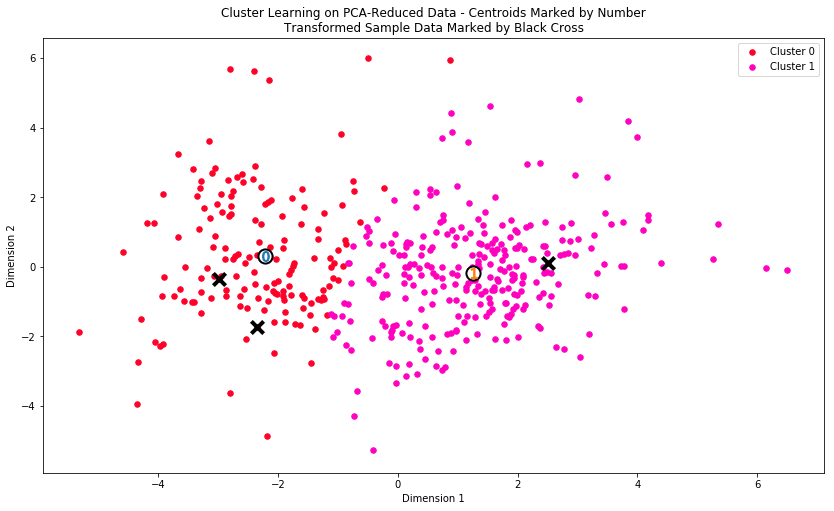

In [75]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

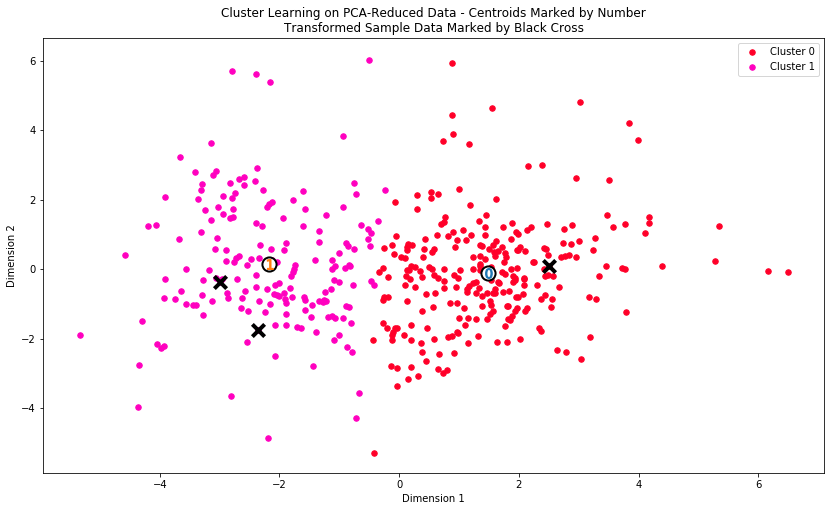

In [76]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, predsKM, centersKM, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [81]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)
# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)
# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  3567.0  7860.0  12249.0   873.0            4713.0         966.0
Segment 1  8939.0  2108.0   2758.0  2073.0             352.0         730.0

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
Differences betweent the means from the true centers indicate that Customers classified as Segment 0, have higher purchases of Fresh and Frozen products, which could be an indication of restaurants. Segment 1 on the other hand showed higher mean purchases of Milk, Grocery, Detergents_Paper, and Delicatessen. This segment could group supermarkets or small convenient stores. 

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [84]:
print(samples, '\n')
# Display the predictions
for i, pred in enumerate(sample_predsKM):
    print ("Sample point", i, "predicted to be in Cluster", pred)

   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  11594   7779    12144    3252              8035          3029
1   3067  13240    23127    3941              9959           731
2   4446    906     1238    3576               153          1014 

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**
No, the predictions are not consistent. 
In fact, it seems that it did not separate, classify, the samples accordingly. 
I think the problem with the samples comes from the fact that Frozen values are very similar across the samples and Milk is inverted all over, not following the intuition from above. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
The A/B test is basically a two sample hypothesis test, where the subjects are dividend into two groups, a control and a test group. The test group subject are then exposed to two options and the selection is recorded for further analysis. 

In the case of the wholesale dataset, the current model is separating the customers into two groups. 

As it is possible that customers within each group have different preferences for delivery, the following steps should be done do perfomr and A/B test. 

Step 1: a subset of customers from each group identified in the model will be randomly selected.
Step 2: Each of these sets will be further divided into two groups: test and control.
Step 3a: Control groups will be provided only one option (5 day delivery)
Step 3b: Test groups will be provided with two options 3 or 5 days delivery
Step 4: Record the preference in test groups
Step 5: Perfomr analysis

This desing should provide information to determine if customers on each of the assigned clusters will prefer a new delivery frequecy (3 days) or remain with the current delivery frequency (5 days). The results from the A/B test then can be applied to all the customers in each of the groups. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
Using the cluster as a new feature, this will be a target feature and now we have a supervised model. I will built a model using this information, and the used the estimated spending from the new customers to predict to which group they belong. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

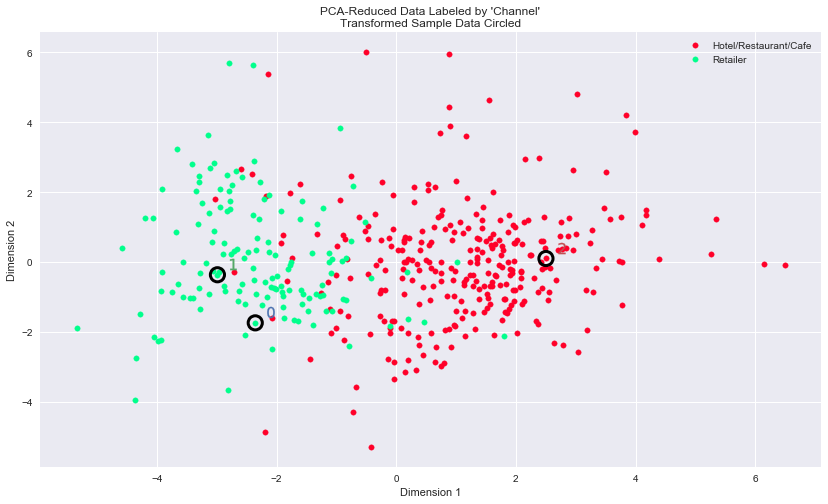

In [227]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
The algorithm used for clustering, apper to largely separate the customers into the labels provided by the variable Channel. However, there are somepoint from each of the labels/cluster that appear misclassified, suggesting that the customer can not purely be classified in the two labels. I am not sure if this is consistent, but I think that the overlap between the two kinds of labels will make this a little problematic to interpret. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.